In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
# Import file
file = "Resources/Incident_data.txt"
df = pd.read_csv(file, encoding="ISO-8859-1", sep='\t')
display(df)

,Notes,Leading Cancer Sites,Leading Cancer Sites Code,States,States Code,Year,Year Code,Race,Race Code,Sex,Sex Code,Count,Population
0,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Asian or Pacific Islander,A-PI,Female,F,18.0,17708
1,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Black or African American,2054-5,Female,F,597.0,623475
2,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,White,2106-3,Female,F,2360.0,1640665
3,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,White,2106-3,Male,M,19.0,1570643
4,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Other Races and Unknown combined,2131-1,Female,F,27.0,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,standard groupings of primary cancer sites.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,"8. For the 2005 year, the Census Bureau estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,Texas due to Hurricanes Katrina and Rita. CDC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3951,"these states, nor are these counts included in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop all columns without any information
df_dropped = df.drop(columns=['Notes','Leading Cancer Sites Code','Year Code','Sex' ],axis=1)
df_dropped = df_dropped.dropna(how='any')
display(df_dropped)

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
0,Breast,Alabama,1.0,1999.0,Asian or Pacific Islander,A-PI,F,18.0,17708
1,Breast,Alabama,1.0,1999.0,Black or African American,2054-5,F,597.0,623475
2,Breast,Alabama,1.0,1999.0,White,2106-3,F,2360.0,1640665
3,Breast,Alabama,1.0,1999.0,White,2106-3,M,19.0,1570643
4,Breast,Alabama,1.0,1999.0,Other Races and Unknown combined,2131-1,F,27.0,Not Applicable
...,...,...,...,...,...,...,...,...,...
3890,Breast,Wyoming,56.0,2014.0,White,2106-3,F,400.0,268767
3891,Breast,Wyoming,56.0,2015.0,White,2106-3,F,327.0,270054
3892,Breast,Wyoming,56.0,2016.0,White,2106-3,F,397.0,269349
3893,Breast,Wyoming,56.0,2017.0,White,2106-3,F,356.0,266963


In [5]:
df_no_other_race = df_dropped[df_dropped["Race"]!="Other Races and Unknown combined"]
df_no_other_race

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
0,Breast,Alabama,1.0,1999.0,Asian or Pacific Islander,A-PI,F,18.0,17708
1,Breast,Alabama,1.0,1999.0,Black or African American,2054-5,F,597.0,623475
2,Breast,Alabama,1.0,1999.0,White,2106-3,F,2360.0,1640665
3,Breast,Alabama,1.0,1999.0,White,2106-3,M,19.0,1570643
5,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,548.0,627439
...,...,...,...,...,...,...,...,...,...
3890,Breast,Wyoming,56.0,2014.0,White,2106-3,F,400.0,268767
3891,Breast,Wyoming,56.0,2015.0,White,2106-3,F,327.0,270054
3892,Breast,Wyoming,56.0,2016.0,White,2106-3,F,397.0,269349
3893,Breast,Wyoming,56.0,2017.0,White,2106-3,F,356.0,266963


In [22]:
df_clean = df_no_other_race[df_no_other_race["Sex Code"]!="M"]
df_clean

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
0,Breast,Alabama,1.0,1999.0,Asian or Pacific Islander,A-PI,F,18.0,17708
1,Breast,Alabama,1.0,1999.0,Black or African American,2054-5,F,597.0,623475
2,Breast,Alabama,1.0,1999.0,White,2106-3,F,2360.0,1640665
5,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,548.0,627439
6,Breast,Alabama,1.0,2000.0,White,2106-3,F,2366.0,1643761
...,...,...,...,...,...,...,...,...,...
3890,Breast,Wyoming,56.0,2014.0,White,2106-3,F,400.0,268767
3891,Breast,Wyoming,56.0,2015.0,White,2106-3,F,327.0,270054
3892,Breast,Wyoming,56.0,2016.0,White,2106-3,F,397.0,269349
3893,Breast,Wyoming,56.0,2017.0,White,2106-3,F,356.0,266963


In [23]:
df_White = df_clean[df_clean["Race"]=="White"]
df_White

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
2,Breast,Alabama,1.0,1999.0,White,2106-3,F,2360.0,1640665
6,Breast,Alabama,1.0,2000.0,White,2106-3,F,2366.0,1643761
11,Breast,Alabama,1.0,2001.0,White,2106-3,F,2460.0,1645541
13,Breast,Alabama,1.0,2002.0,White,2106-3,F,2432.0,1646445
17,Breast,Alabama,1.0,2003.0,White,2106-3,F,2219.0,1650890
...,...,...,...,...,...,...,...,...,...
3890,Breast,Wyoming,56.0,2014.0,White,2106-3,F,400.0,268767
3891,Breast,Wyoming,56.0,2015.0,White,2106-3,F,327.0,270054
3892,Breast,Wyoming,56.0,2016.0,White,2106-3,F,397.0,269349
3893,Breast,Wyoming,56.0,2017.0,White,2106-3,F,356.0,266963


In [24]:
df_white_clean = df_White.drop(columns=['Leading Cancer Sites','States','States Code','Year', 'Race Code','Sex Code' ],axis=1)
df_white_clean

,Race,Count,Population
2,White,2360.0,1640665
6,White,2366.0,1643761
11,White,2460.0,1645541
13,White,2432.0,1646445
17,White,2219.0,1650890
...,...,...,...
3890,White,400.0,268767
3891,White,327.0,270054
3892,White,397.0,269349
3893,White,356.0,266963


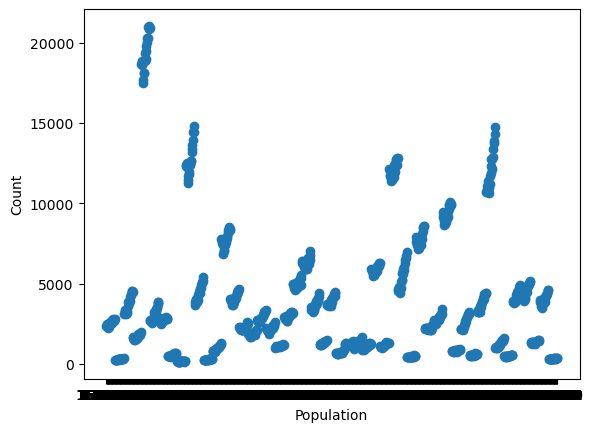

In [25]:

from pathlib import Path
from sklearn.linear_model import LinearRegression

plt.scatter(df_white_clean.Population, df_white_clean.Count)
#plt.xticks([0, 50000, 150000, 250000, 350000, 550000, 750000, 950000])
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

In [26]:
df_white_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 2 to 3894
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Race        1011 non-null   object 
 1   Count       1011 non-null   float64
 2   Population  1011 non-null   object 
dtypes: float64(1), object(2)
memory usage: 31.6+ KB


In [27]:
df_white_clean['Population'] = df_white_clean['Population'].astype(float)

In [28]:
df_white_clean.dtypes

Race           object
Count         float64
Population    float64
dtype: object

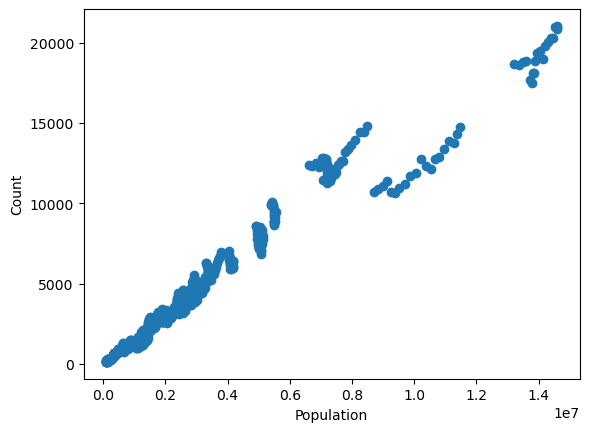

In [29]:
plt.scatter(df_white_clean.Population, df_white_clean.Count)
#plt.xticks([0, 50000, 150000, 250000, 350000, 550000, 750000, 950000])
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

In [30]:
X = df_white_clean.Population.values.reshape(-1, 1)

In [31]:
X.shape

(1011, 1)

In [32]:
y = df_white_clean.Count

In [33]:
model = LinearRegression()

In [34]:
model.fit(X, y)

LinearRegression()

In [35]:
y_pred = model.predict(X)
print(y_pred.shape)

(1011,)


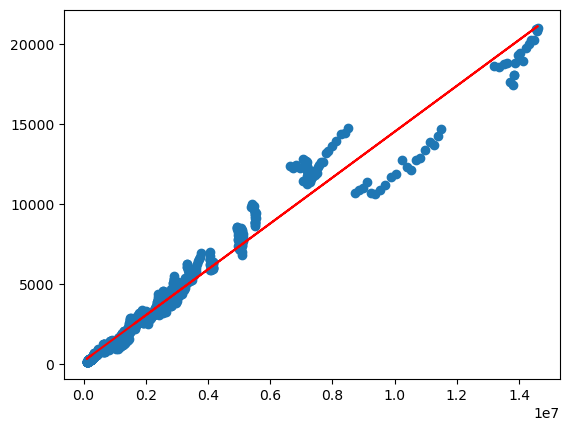

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [37]:
print(model.coef_)
print(model.intercept_)

[0.001434]
204.0271037276707
